In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
#@title Método Runge Kutta

def funcion(t,y,params):
  a=params[0]
  dydt=-a*y
  return dydt

#Condicion incial
a=1
params=(a,)
t0=0.0 #tiempo inicial
y0=100
tfin=1 #tiempo final
Nt=100 #Número de timepos

t=np.linspace(t0,tfin,Nt)
h=1/Nt

k1=funcion(t0,y0,params)
k2=funcion(t0+h/2,y0+(h/2*k1),params)
k3=funcion(t0+h/2,y0+(h/2*k2),params)
k4=funcion(t0+h,y0+h*k3,params)
kmean=(1/6)*(k1+2*k2+2*k3+k4)

y1=y0+kmean*h
t1=t0+h

k1=funcion(t1,y1,params)
k2=funcion(t1+h/2,y1+(h/2*k1),params)
k3=funcion(t1+h/2,y1+(h/2*k2),params)
k4=funcion(t1+h,y1+h*k3,params)
kmean=(1/6)*(k1+2*k2+2*k3+k4)

y2=y1+kmean*h
y2

98.01986733084026

In [4]:
funcion(0,1,params)

-1

In [5]:
#@title Generalización
t0=0.0
y0=100
i=0
t=[]
y=[]
while i<=Nt:
  k1=funcion(t0,y0,params)
  k2=funcion(t0+h/2,y0+(h/2*k1),params)
  k3=funcion(t0+h/2,y0+(h/2*k2),params)
  k4=funcion(t0+h,y0+h*k3,params)
  kmean=(1/6)*(k1+2*k2+2*k3+k4)
  y0=y0+kmean*h
  t0=t0+h
  t.append(t0)
  y.append(y0)
  i+=1
  

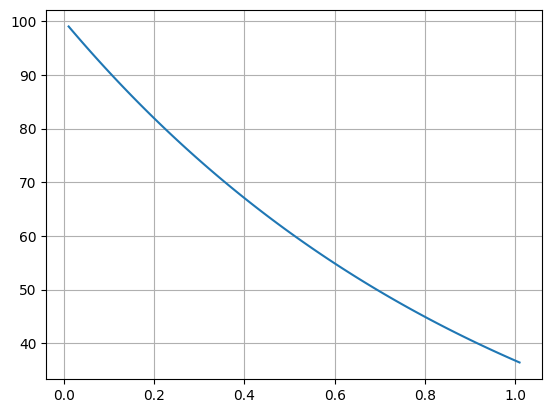

In [6]:
plt.plot(t,y)
plt.grid()

In [7]:
#@title Generalización profe:

t=np.linspace(t0,tfin,Nt)
y_=np.zeros(Nt)
ti=t0
y[0]=y0
for i in range(0,Nt-1):
  k1=funcion(ti,y[i],params)
  k2=funcion(ti+h/2,y[i]+(h/2*k1),params)
  k3=funcion(ti+h/2,y[i]+(h/2*k2),params)
  k4=funcion(ti+h,y[i]+h*k3,params)
  kmean=(1/6)*(k1+2*k2+2*k3+k4)
  y[i+1]=y[i]+kmean*h
  ti=ti+h


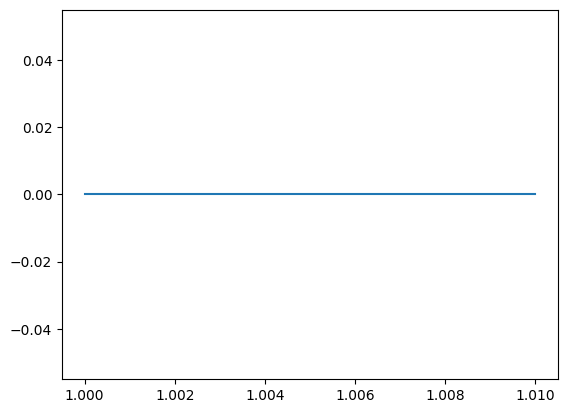

In [8]:
plt.plot(t,y_)


# **Atractor de Lorenz**
$$\frac{ dx}{dt} = a(y-x)$$
$$ \frac{dy}{dt} = x(b-z)-y$$
$$ \frac{dz}{dt} = xy-cz$$
$a=10$, $c=8/3$ y $b$ es variado


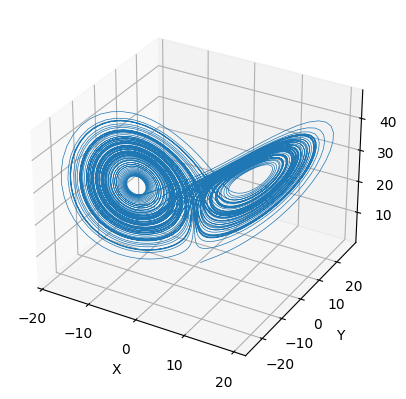

In [14]:
#@title Solución por RungeKutta
sigma = 10
rho = 28
beta = 8/3

h = 0.01
N = 10000

params = (sigma, rho, beta)
params2 = (h, sigma, rho, beta)

def lorenz(x, y, z, params):
  sigma, rho, beta = params
  dxdt = sigma * (y - x)
  dydt = x * (rho - z) - y
  dzdt = x * y - beta * z
  return dxdt, dydt, dzdt

def rk(x, y, z, params2):
  h, sigma, rho, beta = params2
  k1x, k1y, k1z = lorenz(x, y, z, params)
  k2x, k2y, k2z = lorenz(x + h/2 * k1x, y + h/2 * k1y, z + h/2 * k1z, params)
  k3x, k3y, k3z = lorenz(x + h/2 * k2x, y + h/2 * k2y, z + h/2 * k2z, params)
  k4x, k4y, k4z = lorenz(x + h * k3x, y + h * k3y, z + h * k3z, params)

  xmean = x + (h/6) * (k1x + 2*k2x + 2*k3x + k4x)
  ymean = y + (h/6) * (k1y + 2*k2y + 2*k3y + k4y)
  zmean = z + (h/6) * (k1z + 2*k2z + 2*k3z + k4z)
  return xmean, ymean, zmean

x0 = 1
y0 = 1
z0 = 1

def atractor(x0, y0, z0, params2, N):
  x = np.zeros(N)
  y = np.zeros(N)
  z = np.zeros(N)

  x[0] = x0
  y[0] = y0
  z[0] = z0

  for i in range(1, N):
    x[i], y[i], z[i] = rk(x[i-1], y[i-1], z[i-1], params2)
  return x, y, z

x, y, z = atractor(x0, y0, z0, params2, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


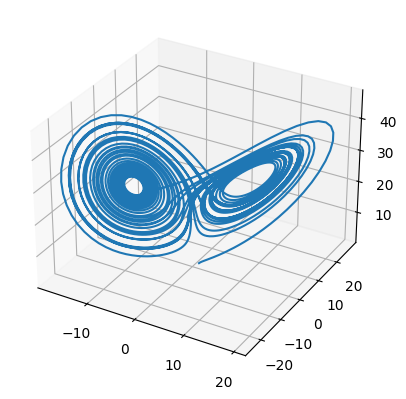

In [11]:
#@title Solución por odeint y simulación (extraído de Wikipedia)
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # Desempaqueta el vector de estado
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.show()
